# Tarea 1 - Tel341: Simulación de Redes 2024-1

## Nombre: Pedro Arce.

_______________________________________________________________________________________________________________________________

#### _((Apuntes Importantes)):_

- *Servidor tiene una capacidad limitada definida (C)*

- *¿Puedo dimensionar el valor que debe tener C para ofrecer una calidad de servicio mínima aceptable?*

- Se consideran **INFINITOS** usuarios
- **C = 45** "unidades de cómputo del servidor" (una combinación de CPU, GPU, RAM y Disco Duro)
- Llegadas y salidas => proceso aleatorio **EXPONENCIAL POISSON** => La distribución exponencial describe el tiempo hasta la primera ocurrencia de un evento de Poisson. Así, las aplicaciones más importantes de esta distribución son aquellas situaciones en donde se aplica el proceso de Pois- son.
<img src="https://image.slidesharecdn.com/pvplivyryyyilxfh86ug-signature-61a998d2238d19b152f2e436dddea1170480983fcb4c0abda13d4163792f70b1-poli-150512231931-lva1-app6891/85/exponencial-poisson-4-320.jpg">
- tasas media de llegadas de usuario **𝜆 = 300**
- tasa media de servicio en el enlace **𝜇 = 10**
- No existe cola de espera (sin buffers)

- **¿Cuál es la probabilidad de que un usuario no pueda conectarse por congestión en el enlace?**

_______________________________________________________________________________________________________________________________

# Simulador de Servidor de Redes Sociales.

In [1]:
#Librerías a utilizar

import numpy as np

import heapq  #librería útil para manejar la lista de eventos como una cola de prioridades

import time #para imprimir tiempo que demora por iteración
            #no es requisito, pero sirve para saber cuanto tiempo real requiere ir testeando la simulación

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import pandas as pd #librerias útiles para graficar

In [2]:
# 1. Definición de variables, estados y sistema
### (El código debe ser autocontenido y comentado con las explicaciones pertinentes).

#Variables:
C = 45 #capacidad de usuarios del servidor
l = 300 #tasa media de llegadas lambda
u = 10 #tasa media de servicio mu

In [3]:
# 2. Estado inicial del sistema. (No puede haber salidas si no hay llegadas)
# 3. Gestión de los eventos en la línea de tiempo, para así reconocer si los eventos son salidas o llegadas.
# 4. Como criterio de parada utilice la definición de un número finito de llegadas de usuarios (denominado LLEGADAS).
# 5. Cálculo de las métricas al finalizar la simulación.

class ServidorSimulacion:
    def __init__(self, num_llegadas, capacidad=C): #proceso inicial para instanciar la simulación
        self.capacidad = capacidad
        self.num_llegadas = num_llegadas
        self.eventos = []
        self.usuarios_activos = 0
        self.bloqueos = 0
        self.llegadas_completadas = 0
        self.tiempos_de_bloqueo = []
        self.tiempos_registro = []

    def planificar_llegadas(self):
        tiempo_actual = 0 #Planificar solo la primera llegada para iniciar el ciclo
        tiempo_entre_llegadas = np.random.exponential(1/l)  #l = λ = 300 (tasa media de llegadas)
        tiempo_servicio = np.random.exponential(1/u)  #u = μ = 10 (tasa media de servicio)
        tiempo_proxima_llegada = tiempo_actual + tiempo_entre_llegadas
        #se agregan los eventos a una cola de prioridades, esto garantiza que se procesarán en orden cronológico
        heapq.heappush(self.eventos, (tiempo_proxima_llegada, 'llegada', tiempo_servicio))

    def procesar_eventos(self): #extrae y procesa eventos de la cola de prioridades hasta que esté vacía
        self.planificar_llegadas() #iniciar con la primera llegada
        while self.eventos:
            tiempo, tipo_evento, tiempo_servicio = heapq.heappop(self.eventos)
            if tipo_evento == 'llegada':
                self.procesar_llegada(tiempo, tiempo_servicio)

    def procesar_llegada(self, tiempo, tiempo_servicio):
        #si hay capacidad, programa una salida para el usuario después de su tiempo de servicio
        if self.usuarios_activos < self.capacidad:
            self.usuarios_activos += 1
            tiempo_salida = tiempo + tiempo_servicio
            heapq.heappush(self.eventos, (tiempo_salida, 'salida', None))
        else: #si no, incrementa el contador de bloqueos
            self.bloqueos += 1
        
        #al llegar acá, el proceso de llegada se contempla como completado
        self.llegadas_completadas += 1 
        if self.llegadas_completadas < self.num_llegadas:
            #planificar la siguiente llegada inmediatamente después de procesar la actual
            tiempo_entre_llegadas = np.random.exponential(1/l)
            tiempo_proxima_llegada = tiempo + tiempo_entre_llegadas
            tiempo_servicio = np.random.exponential(1/u)
            heapq.heappush(self.eventos, (tiempo_proxima_llegada, 'llegada', tiempo_servicio))
            
        if self.llegadas_completadas % (self.num_llegadas // 100) == 0: #registrar probabilidad de bloqueo
            self.tiempos_de_bloqueo.append(self.bloqueos / self.llegadas_completadas)
            self.tiempos_registro.append(tiempo) #registrar tiempo actual del evento

    def simular(self): #inicia la simulación
        self.procesar_eventos()

    def resultados(self):
        prob_bloqueo = self.bloqueos / self.num_llegadas
        return prob_bloqueo, self.tiempos_de_bloqueo, self.tiempos_registro
        #devuelve prob de bloqueo, historial de probs de bloqueo y tiempos en que ocurren los eventos

## Listas de eventos futuros (FEL) para cada simulación.

[Simulación con 100 (10^2) llegadas de usuario]

- Probabilidad general de bloqueo: 0.55

- Probabilidades de bloqueo cada 1 llegadas:
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.021739130434782608, 0.0425531914893617, 0.0625, 0.08163265306122448, 0.1, 0.11764705882352941, 0.1346153846153846, 0.1509433962264151, 0.16666666666666666, 0.18181818181818182, 0.19642857142857142, 0.21052631578947367, 0.22413793103448276, 0.23728813559322035, 0.25, 0.26229508196721313, 0.27419354838709675, 0.2857142857142857, 0.296875, 0.3076923076923077, 0.3181818181818182, 0.3283582089552239, 0.3382352941176471, 0.34782608695652173, 0.35714285714285715, 0.36619718309859156, 0.375, 0.3835616438356164, 0.3918918918918919, 0.4, 0.40789473684210525, 0.4155844155844156, 0.4230769230769231, 0.43037974683544306, 0.4375, 0.44444444444

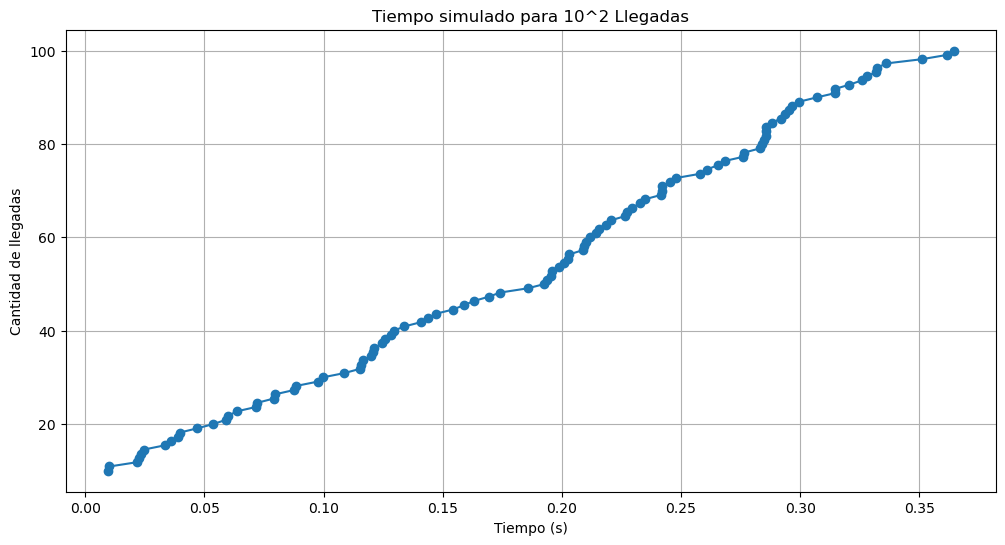

(Tiempo real necesario: 0.30338239669799805 segs.)




[Simulación con 1000 (10^3) llegadas de usuario]

- Probabilidad general de bloqueo: 0.955

- Probabilidades de bloqueo cada 10 llegadas:
[0.0, 0.0, 0.0, 0.0, 0.1, 0.25, 0.35714285714285715, 0.4375, 0.5, 0.55, 0.5909090909090909, 0.625, 0.6538461538461539, 0.6785714285714286, 0.7, 0.71875, 0.7352941176470589, 0.75, 0.7631578947368421, 0.775, 0.7857142857142857, 0.7954545454545454, 0.8043478260869565, 0.8125, 0.82, 0.8269230769230769, 0.8333333333333334, 0.8392857142857143, 0.8448275862068966, 0.85, 0.8548387096774194, 0.859375, 0.8636363636363636, 0.8676470588235294, 0.8714285714285714, 0.875, 0.8783783783783784, 0.881578947368421, 0.8846153846153846, 0.8875, 0.8902439024390244, 0.8928571428571429, 0.8953488372093024, 0.8977272727272727, 0.9, 0.9021739130434783, 0.9042553191489362, 0.90625, 0.9081632653061225, 0.91, 0.9117647058823529, 0.9134615384615384, 0.9150943396226415, 0.9166666666666666, 0.9181818181818182, 0.919642857142857

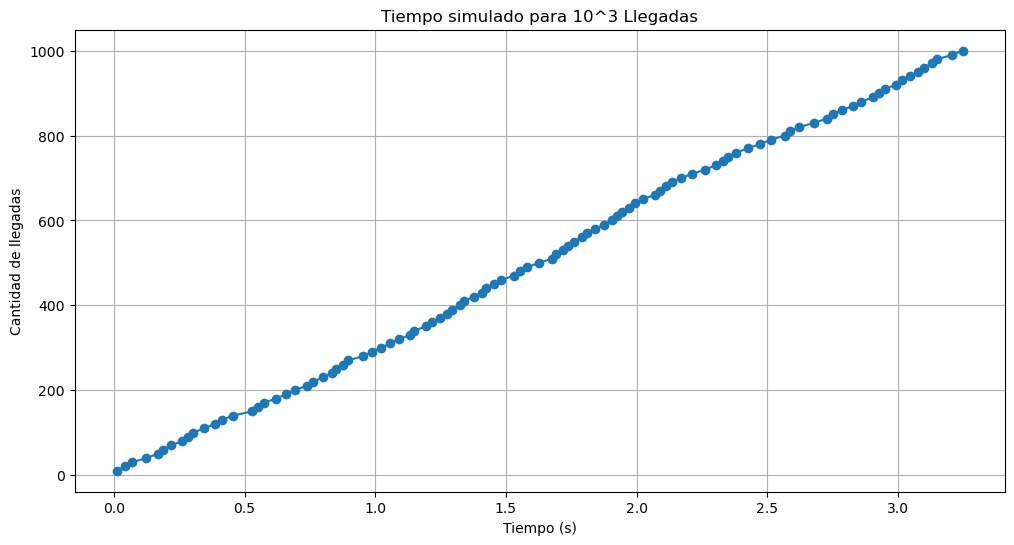

(Tiempo real necesario: 0.30890798568725586 segs.)




[Simulación con 10000 (10^4) llegadas de usuario]

- Probabilidad general de bloqueo: 0.9955

- Probabilidades de bloqueo cada 100 llegadas:
[0.55, 0.775, 0.85, 0.8875, 0.91, 0.925, 0.9357142857142857, 0.94375, 0.95, 0.955, 0.9590909090909091, 0.9625, 0.9653846153846154, 0.9678571428571429, 0.97, 0.971875, 0.9735294117647059, 0.975, 0.9763157894736842, 0.9775, 0.9785714285714285, 0.9795454545454545, 0.9804347826086957, 0.98125, 0.982, 0.9826923076923076, 0.9833333333333333, 0.9839285714285714, 0.9844827586206897, 0.985, 0.9854838709677419, 0.9859375, 0.9863636363636363, 0.986764705882353, 0.9871428571428571, 0.9875, 0.9878378378378379, 0.9881578947368421, 0.9884615384615385, 0.98875, 0.9890243902439024, 0.9892857142857143, 0.9895348837209302, 0.9897727272727272, 0.99, 0.9902173913043478, 0.9904255319148936, 0.990625, 0.9908163265306122, 0.991, 0.9911764705882353, 0.9913461538461539, 0.9915094339622641, 0.9916666666666667, 0.9918181

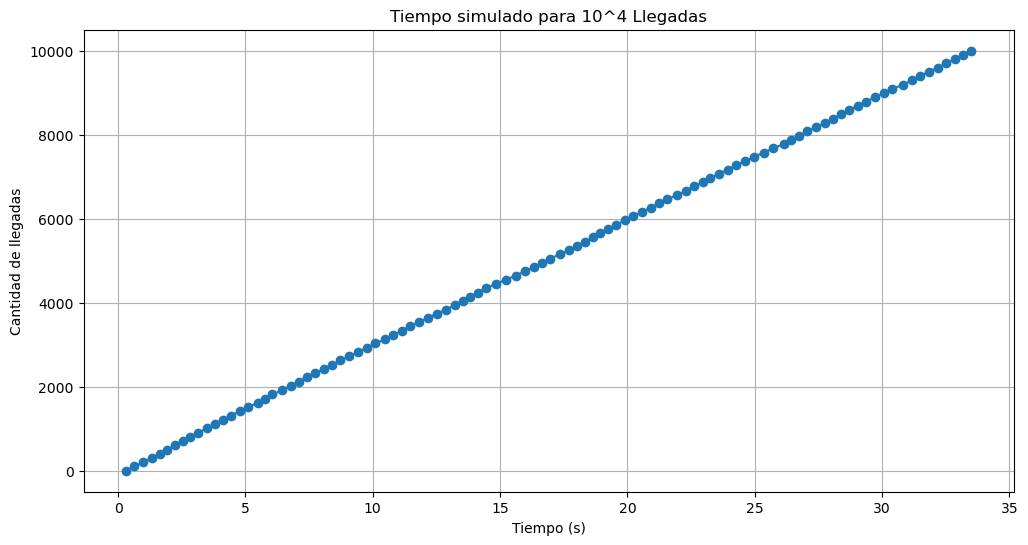

(Tiempo real necesario: 0.4027068614959717 segs.)




[Simulación con 100000 (10^5) llegadas de usuario]

- Probabilidad general de bloqueo: 0.99955

- Probabilidades de bloqueo cada 1000 llegadas:
[0.955, 0.9775, 0.985, 0.98875, 0.991, 0.9925, 0.9935714285714285, 0.994375, 0.995, 0.9955, 0.9959090909090909, 0.99625, 0.9965384615384615, 0.9967857142857143, 0.997, 0.9971875, 0.9973529411764706, 0.9975, 0.9976315789473684, 0.99775, 0.9978571428571429, 0.9979545454545454, 0.9980434782608696, 0.998125, 0.9982, 0.9982692307692308, 0.9983333333333333, 0.9983928571428572, 0.998448275862069, 0.9985, 0.9985483870967742, 0.99859375, 0.9986363636363637, 0.9986764705882353, 0.9987142857142857, 0.99875, 0.9987837837837837, 0.9988157894736842, 0.9988461538461538, 0.998875, 0.9989024390243902, 0.9989285714285714, 0.998953488372093, 0.9989772727272728, 0.999, 0.9990217391304348, 0.9990425531914894, 0.9990625, 0.9990816326530613, 0.9991, 0.9991176470588236, 0.9991346153846153, 0.9991509433962265, 0.999

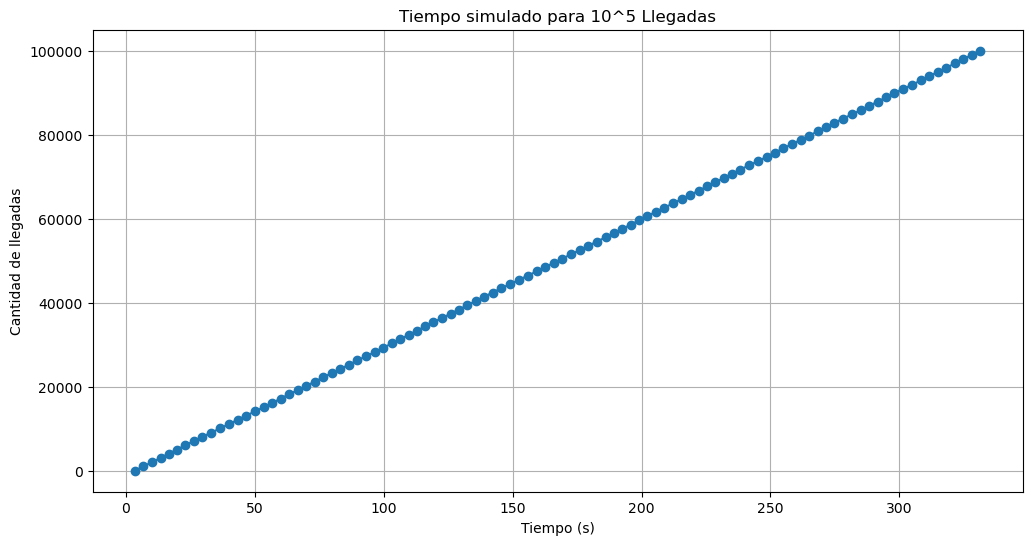

(Tiempo real necesario: 0.9436023235321045 segs.)




[Simulación con 1000000 (10^6) llegadas de usuario]

- Probabilidad general de bloqueo: 0.999955

- Probabilidades de bloqueo cada 10000 llegadas:
[0.9955, 0.99775, 0.9985, 0.998875, 0.9991, 0.99925, 0.9993571428571428, 0.9994375, 0.9995, 0.99955, 0.9995909090909091, 0.999625, 0.9996538461538461, 0.9996785714285714, 0.9997, 0.99971875, 0.999735294117647, 0.99975, 0.9997631578947368, 0.999775, 0.9997857142857143, 0.9997954545454546, 0.999804347826087, 0.9998125, 0.99982, 0.9998269230769231, 0.9998333333333334, 0.9998392857142857, 0.9998448275862069, 0.99985, 0.9998548387096774, 0.999859375, 0.9998636363636364, 0.9998676470588236, 0.9998714285714285, 0.999875, 0.9998783783783783, 0.9998815789473684, 0.9998846153846154, 0.9998875, 0.9998902439024391, 0.9998928571428571, 0.9998953488372093, 0.9998977272727273, 0.9999, 0.9999021739130435, 0.999904255319149, 0.99990625, 0.9999081632653061, 0.99991, 0.9999117647058824, 0.9999134615384615, 

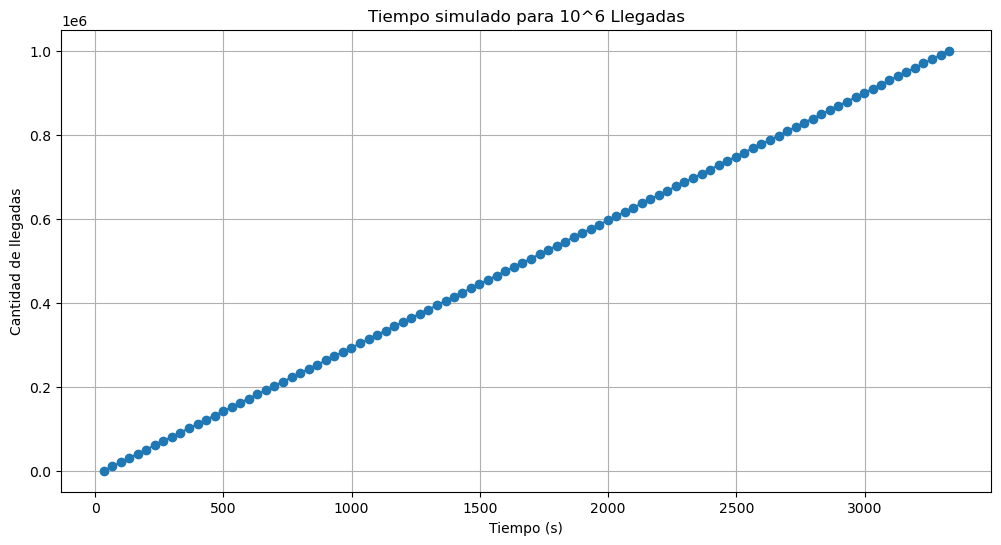

(Tiempo real necesario: 3.378009557723999 segs.)




[Simulación con 10000000 (10^7) llegadas de usuario]

- Probabilidad general de bloqueo: 0.9999955

- Probabilidades de bloqueo cada 100000 llegadas:
[0.99955, 0.999775, 0.99985, 0.9998875, 0.99991, 0.999925, 0.9999357142857143, 0.99994375, 0.99995, 0.999955, 0.999959090909091, 0.9999625, 0.9999653846153846, 0.9999678571428572, 0.99997, 0.999971875, 0.9999735294117648, 0.999975, 0.9999763157894737, 0.9999775, 0.9999785714285714, 0.9999795454545455, 0.9999804347826087, 0.99998125, 0.999982, 0.9999826923076923, 0.9999833333333333, 0.9999839285714286, 0.9999844827586207, 0.999985, 0.9999854838709678, 0.9999859375, 0.9999863636363636, 0.9999867647058823, 0.9999871428571429, 0.9999875, 0.9999878378378378, 0.9999881578947368, 0.9999884615384615, 0.99998875, 0.999989024390244, 0.9999892857142857, 0.9999895348837209, 0.9999897727272727, 0.99999, 0.9999902173913043, 0.9999904255319149, 0.999990625, 0.9999908163265306, 0.999991, 0.999991176470

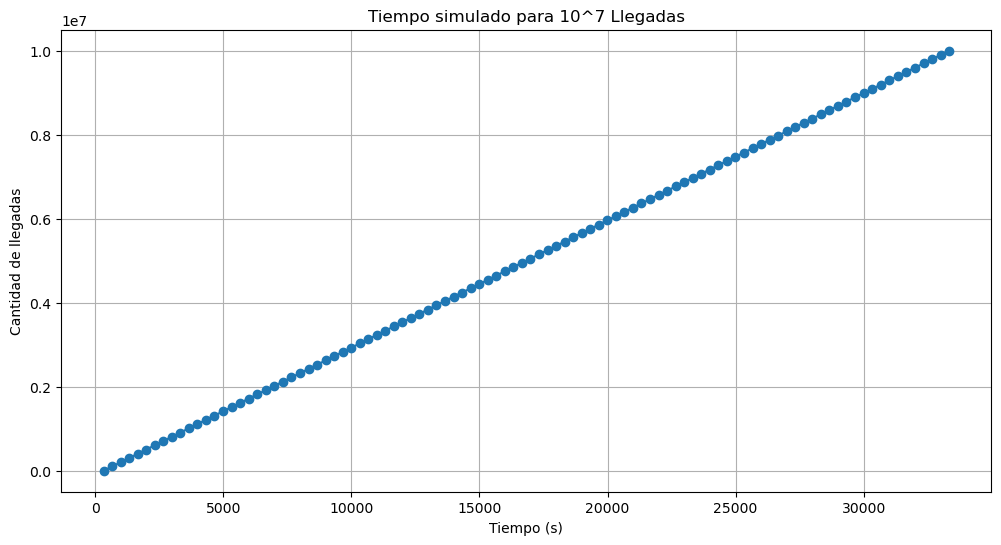

(Tiempo real necesario: 31.64416265487671 segs.)




[Simulación con 100000000 (10^8) llegadas de usuario]

- Probabilidad general de bloqueo: 0.99999955

- Probabilidades de bloqueo cada 1000000 llegadas:
[0.999955, 0.9999775, 0.999985, 0.99998875, 0.999991, 0.9999925, 0.9999935714285715, 0.999994375, 0.999995, 0.9999955, 0.9999959090909091, 0.99999625, 0.9999965384615385, 0.9999967857142857, 0.999997, 0.9999971875, 0.9999973529411764, 0.9999975, 0.9999976315789474, 0.99999775, 0.9999978571428572, 0.9999979545454546, 0.9999980434782608, 0.999998125, 0.9999982, 0.9999982692307692, 0.9999983333333333, 0.9999983928571429, 0.999998448275862, 0.9999985, 0.9999985483870968, 0.99999859375, 0.9999986363636364, 0.9999986764705883, 0.9999987142857143, 0.99999875, 0.9999987837837838, 0.9999988157894737, 0.9999988461538462, 0.999998875, 0.9999989024390243, 0.9999989285714286, 0.9999989534883721, 0.9999989772727272, 0.999999, 0.9999990217391305, 0.9999990425531915, 0.9999990625, 0.999999081632653,

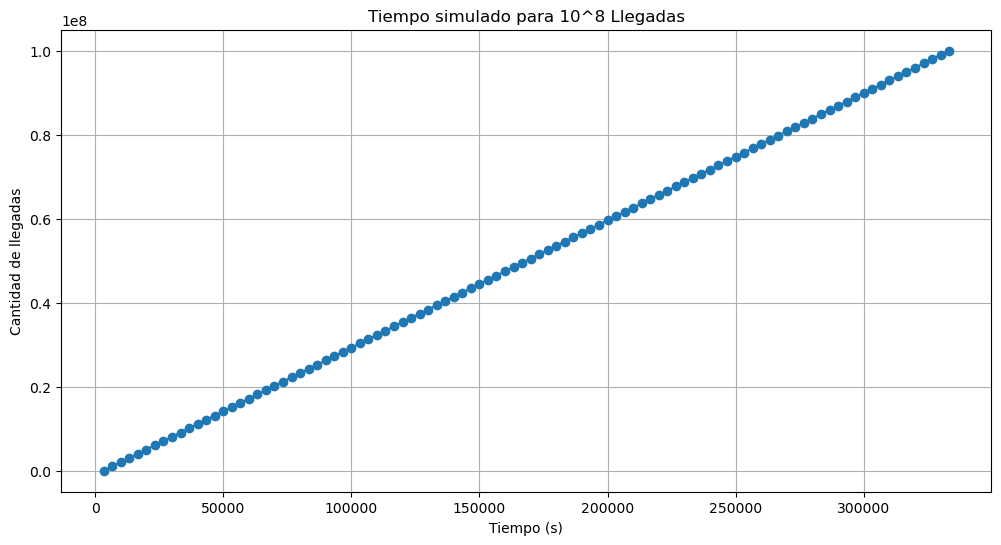

(Tiempo real necesario: 5.819533721605937 mins.)




[Simulación con 1000000000 (10^9) llegadas de usuario]

- Probabilidad general de bloqueo: 0.999999955

- Probabilidades de bloqueo cada 10000000 llegadas:
[0.9999955, 0.99999775, 0.9999985, 0.999998875, 0.9999991, 0.99999925, 0.9999993571428571, 0.9999994375, 0.9999995, 0.99999955, 0.999999590909091, 0.999999625, 0.9999996538461539, 0.9999996785714286, 0.9999997, 0.99999971875, 0.9999997352941177, 0.99999975, 0.9999997631578947, 0.999999775, 0.9999997857142857, 0.9999997954545454, 0.9999998043478261, 0.9999998125, 0.99999982, 0.9999998269230769, 0.9999998333333333, 0.9999998392857142, 0.9999998448275862, 0.99999985, 0.9999998548387097, 0.999999859375, 0.9999998636363636, 0.9999998676470588, 0.9999998714285714, 0.999999875, 0.9999998783783783, 0.9999998815789474, 0.9999998846153846, 0.9999998875, 0.9999998902439025, 0.9999998928571429, 0.9999998953488373, 0.9999998977272727, 0.9999999, 0.999999902173913, 0.9999999042553191, 0.9999999

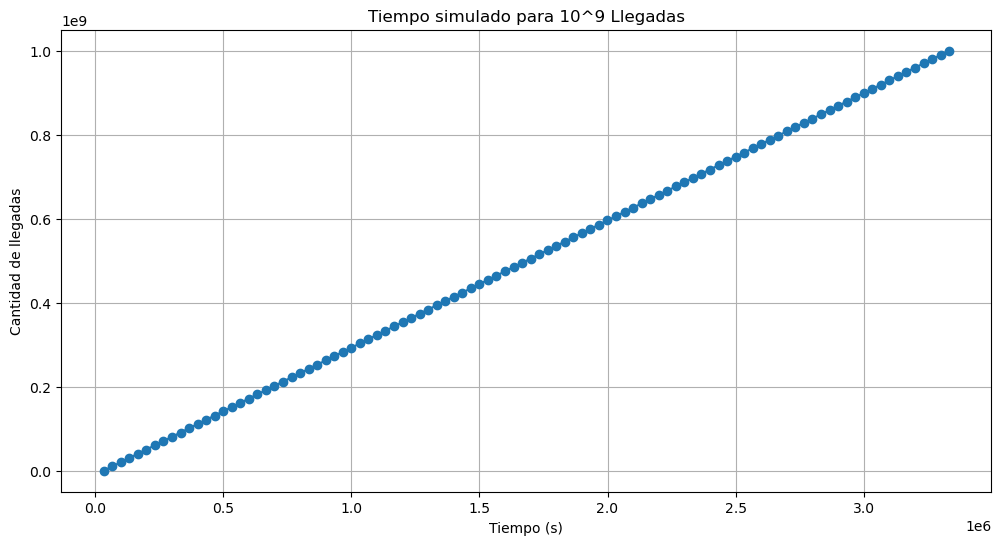

(Tiempo real necesario: 40.41176478862762 mins.)






In [4]:
# El simulador se debe ejecutar 8 veces, donde cada una de ellas debe ejecutarse con 10^i llegadas de 
#  usuarios (criterio de parada), donde i tiene el valor de 2,3,4,5,6,7,8 y 9.

# Declare un método para definir el avance de tiempo (FEL). En este sentido puede aprovechar las 
#  funciones de Python para crear y utilizar una línea de tiempo, o cree un medio propio para 
#  representar el avance de tiempo de la simulación.

x = 9
valores_i = range(2, x+1) #Valores de i para 10^i llegadas de usuarios
                          ## i va desde 2 hasta x

resultados_bloqueo = []
historiales_bloqueo = []
    
for i in valores_i:
    tiempo_ini = time.time()
    
    num_llegadas = 10**i #LLEGADAS
    simulador = ServidorSimulacion(num_llegadas=num_llegadas)
    simulador.simular()
    prob_bloqueo, historial_bloqueo, tiempos_registro = simulador.resultados()
    resultados_bloqueo.append(prob_bloqueo)
    historiales_bloqueo.append(historial_bloqueo)
    print(f"[Simulación con {num_llegadas} (10^{i}) llegadas de usuario]")

    print(f"\n- Probabilidad general de bloqueo: {prob_bloqueo}")
    print(f"\n- Probabilidades de bloqueo cada {num_llegadas//100} llegadas:\n{historial_bloqueo}")
    print(f"\n- Tiempos en que ocurre cada evento:\n{tiempos_registro}")
    
    #graficamos Lista de eventos futuros (FEL) para cada simulación
    plt.figure(figsize=(12, 6))
    plt.plot(tiempos_registro, np.linspace(10, 10**i, len(tiempos_registro)), marker='o')
    plt.title(f'Tiempo simulado para 10^{i} Llegadas')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Cantidad de llegadas')
    plt.grid(True)
    plt.show()
    
    tiempo_final = time.time()
    tiempo = tiempo_final-tiempo_ini
    if tiempo < 60:
        print(f"(Tiempo real necesario: {tiempo} segs.)\n\n\n\n")
    else:
        print(f"(Tiempo real necesario: {tiempo/60} mins.)\n\n\n\n")

_______________________________________________________________________________________________________________________________

# Gráfico de probabilidades de bloqueo.

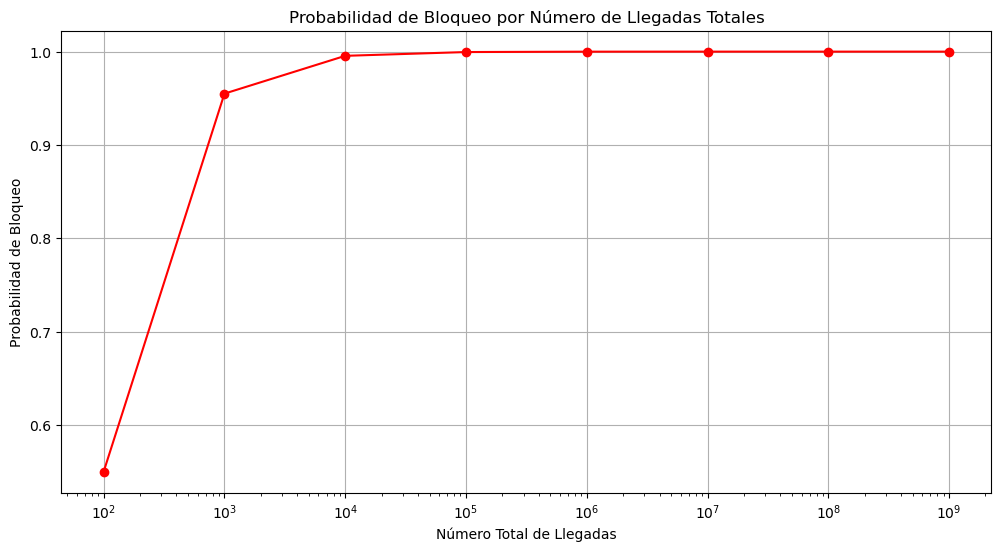

In [11]:
# 1.  Un gráfico que indique las probabilidades de bloqueo (eje Y) por el número de llegadas totales 
#  de usuarios ejecutadas en cada simulación (eje X).

#guardar resultados en un DataFrame
df = pd.DataFrame({
    'Llegadas': [10**i for i in valores_i],
    'Probabilidad Bloqueo': resultados_bloqueo,
})

#gráfico
plt.figure(figsize=(12, 6))
plt.plot(df['Llegadas'], df['Probabilidad Bloqueo'], marker='o', linestyle='-', color='red')
plt.title('Probabilidad de Bloqueo por Número de Llegadas Totales')
plt.xlabel('Número Total de Llegadas')
plt.ylabel('Probabilidad de Bloqueo')
plt.xscale('log')
plt.grid(True)
plt.show()

_______________________________________________________________________________________________________________________________

## Gráficos individuales para cada simulación (Avance de la probabilidad de bloqueo).

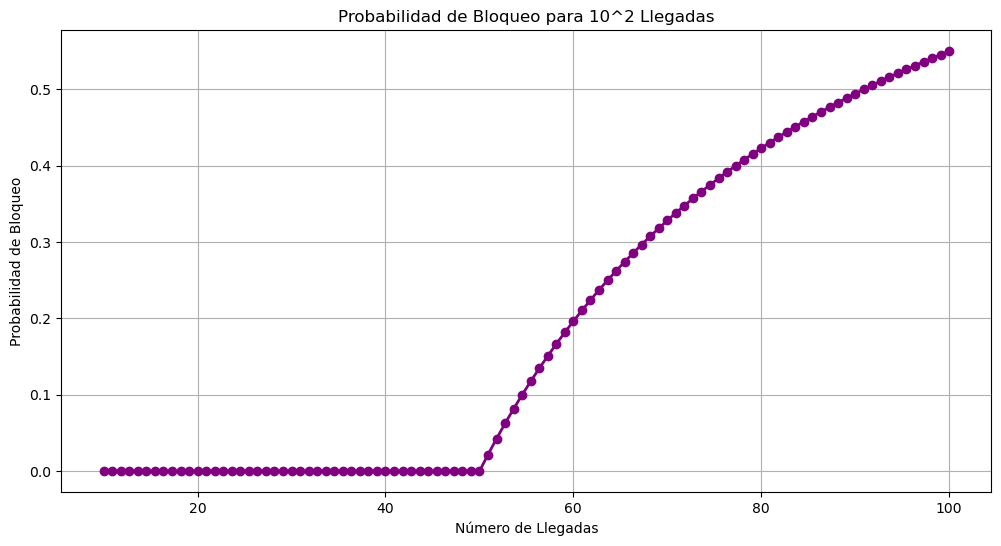

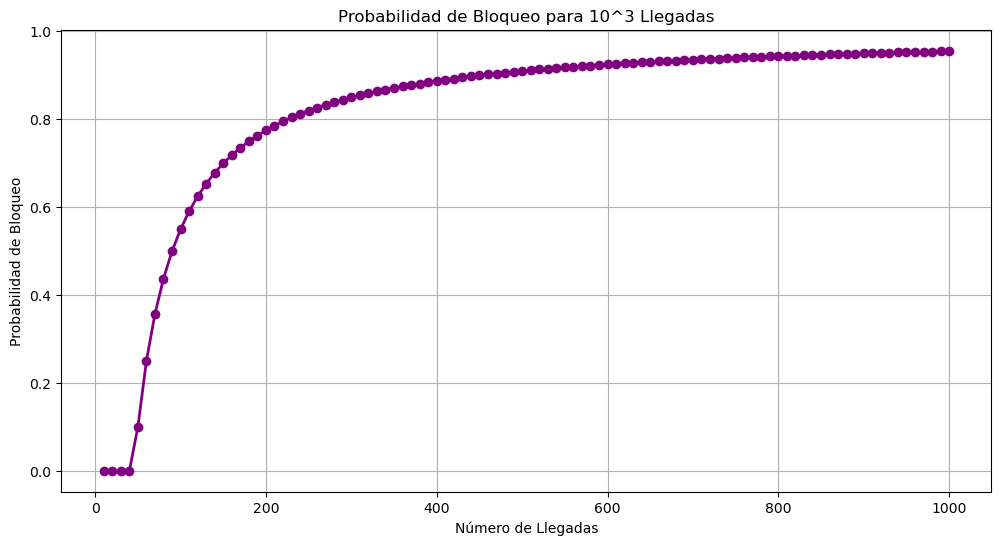

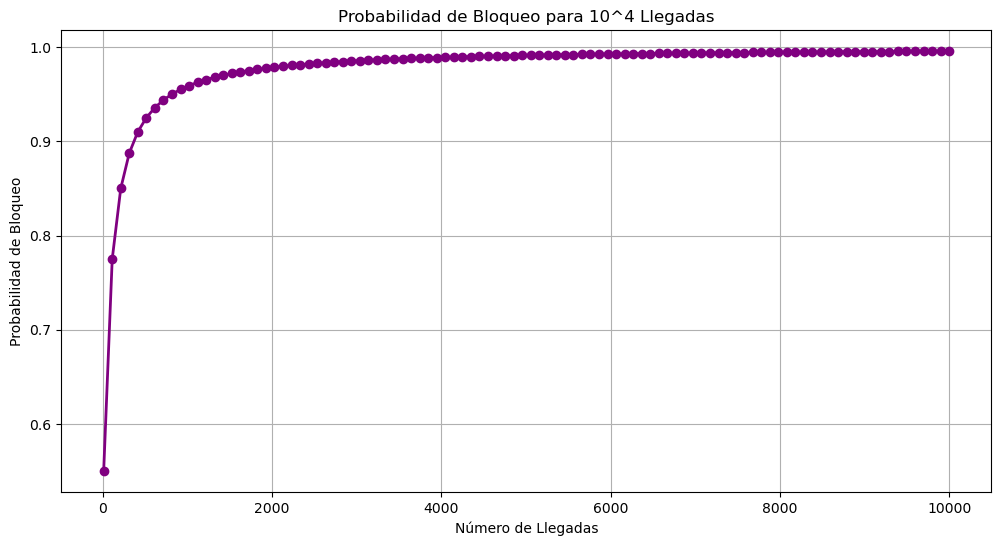

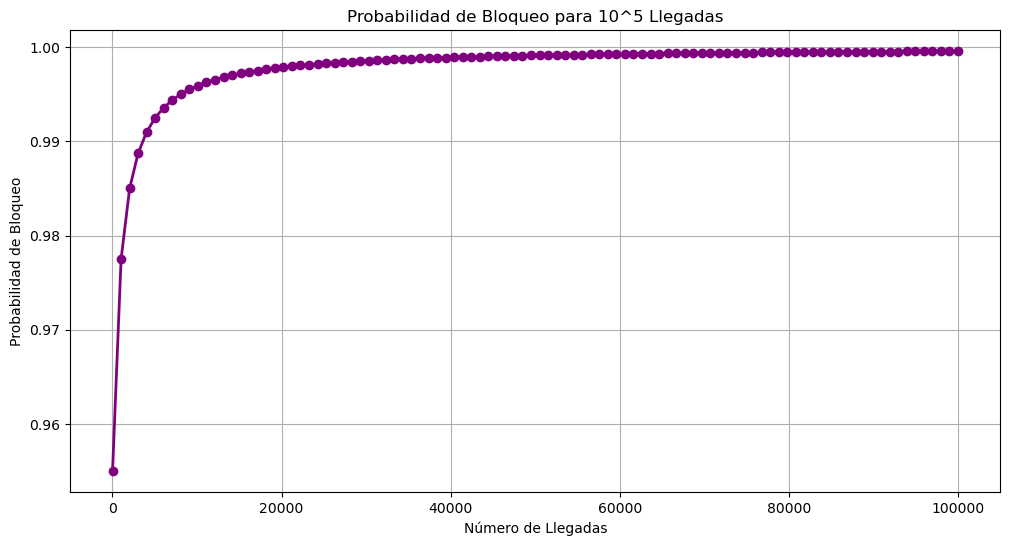

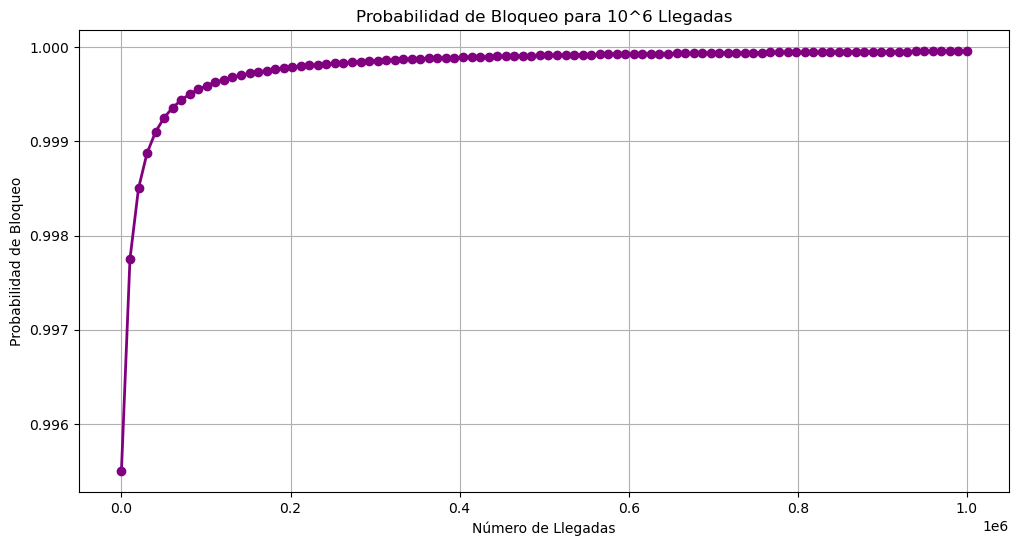

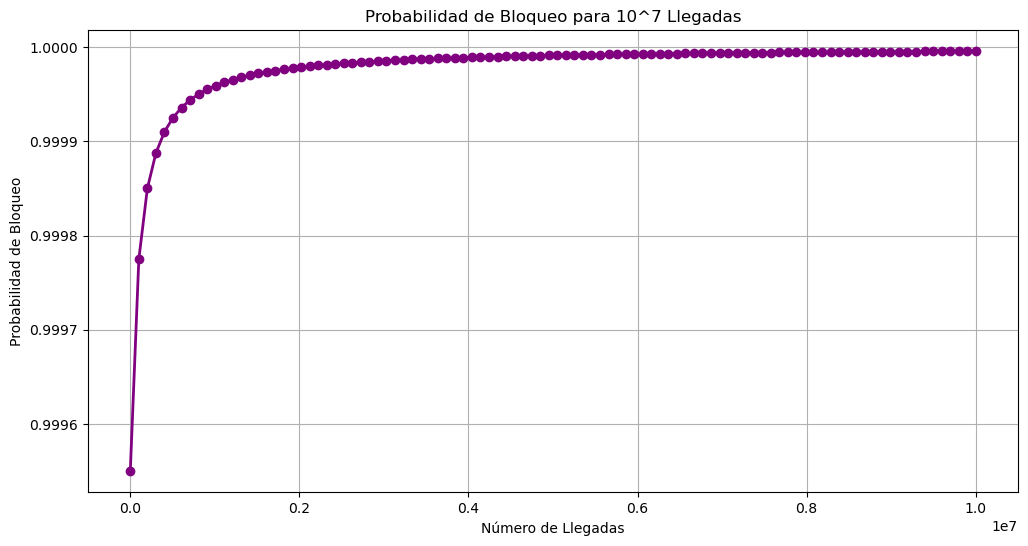

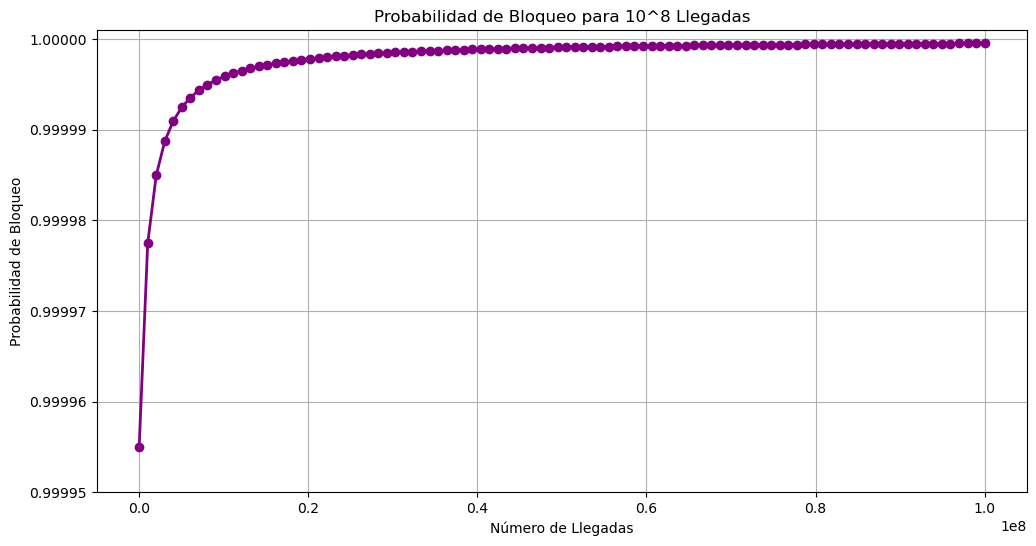

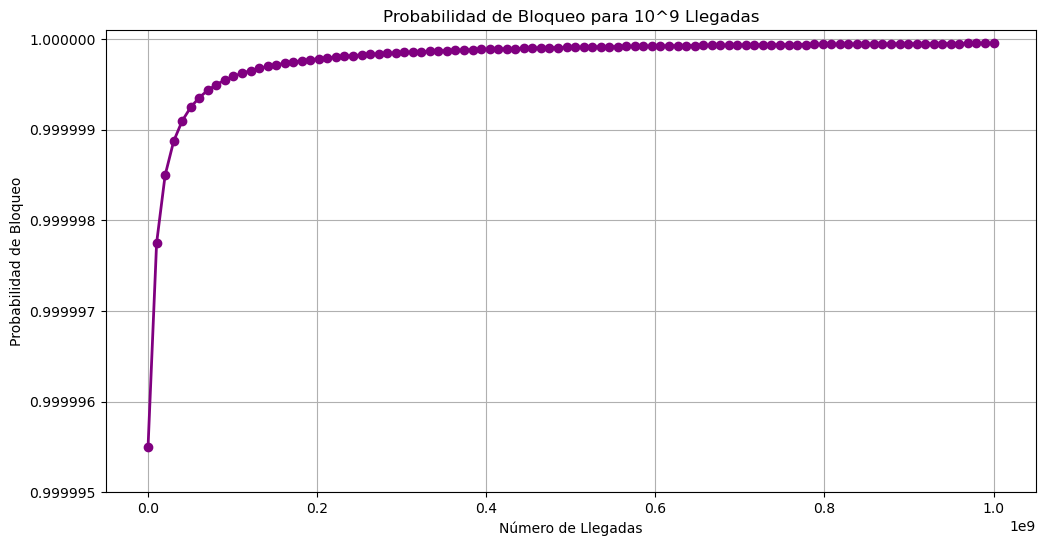

In [6]:
# 2. Ocho gráficos que muestren el avance de la probabilidad de bloqueo según el número de 
#  llegadas ejecutadas (Lista obtenida por cada simulación), para cada simulación hecha.

# Graficar el historial de bloqueo para cada simulación
for i, historial in enumerate(historiales_bloqueo):
    plt.figure(figsize=(12, 6))
    #print(historial)
    plt.plot(np.linspace(10, 10**valores_i[i], len(historial)), historial, marker='o', linewidth='2', color='purple')
    plt.title(f'Probabilidad de Bloqueo para 10^{valores_i[i]} Llegadas')
    plt.xlabel('Número de Llegadas')
    plt.ylabel('Probabilidad de Bloqueo')
    plt.grid(True)
    if valores_i[i] == 8:
        #configurar el formato de los ticks en el eje Y para mostrar para una mejor apreciación de los resultados
        plt.ylim(0.99995, 1.000001)  #limitar el eje Y a mostrar valores entre estos decimale
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.5f')) #muestra 5 decimales
    elif valores_i[i] == 9:
        plt.ylim(0.999995, 1.0000001)
        plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.6f'))  #muestra 6 decimales     
    plt.show()

In [7]:
#Ejecutar siguiente cuadro en caso de no tener instalado Voilà

# (Incluido demostración personalizada de su uso y documentación oficial utilizada como anexo en PDF
#  dentro del archivo comprimido de esta entrega.)

In [8]:
#pip install voila

_______________________________________________________________________________________________________________________________

# Análisis final:
A partir de los datos recolectados y la visualización de los resultados obtenidos, podemos observar los siguientes puntos clave:

- A medida que existe un mayor número de llegadas, la probabilidad general de bloqueo es mucho más cercana a 1.

Esto es natural de pensar, dado que mientras mayor solicitud de entradas simultáneas a nuestro sistema exista, al contar con tan solo una capacidad limitada de 45 unidades de cómputo del servidor de redes sociales, mayor será la cantidad de bloqueos en el tiempo.

- Se puede apreciar que los gráficos individuales para cada simulación de 10^i llegadas, en el avance de la probabilidad de bloqueo, tienen sentido y están correctamente simulados, dado que representan a curvas comúnmente vistas en distribuciones de probabilidad de Poisson.

-  ***Estabilización de datos:*** 

A partir de lo anterior y de todos los gráficos individuales obtenidos, tanto los de las listas de eventos futuros como los de las probabilidades de bloqueo, a mayor cantidad de llegadas hay una mayor estabilización de los datos (es decir, existe una menor dispersión de estos dado que las situaciones que se dan en una gran cantidad de número de llegadas son en su inmensa mayoría bloqueos).

- ***Probabilidad de Bloqueo en escalas menores:***

En las simulaciones con menos llegadas (10^2 llegadas), la curva muestra un aumento progresivo y más suave en la probabilidad de bloqueo a medida que el tiempo avanza. Esto indica que en sistemas con menor carga, el comportamiento del sistema cambia de manera más predecible y gradual. La forma de la curva en este contexto puede ser útil para entender cómo se comporta el sistema bajo condiciones de carga ligera, lo cual es crítico para la planificación de capacidad y la gestión de rendimiento en etapas tempranas o en sistemas con baja utilización.

- ***Comportamiento en escalas mayores:***

Para el caso de 10^8 o 10^9 llegadas, donde la probabilidad de bloqueo se estabiliza muy cerca del 1 (o 100%), muestra que el sistema está prácticamente saturado y cada nueva llegada casi seguramente encontrará el sistema en un estado de incapacidad para manejar más usuarios o tareas. Esto refleja un escenario de sobrecarga, donde la probabilidad de no poder manejar nuevas llegadas es extremadamente alta.

- ***Implicaciones para la gestión del sistema:*** 

Los resultados sugieren la importancia de una gestión eficaz de la capacidad y recursos del sistema.

Es evidente que un aumento significativo en el número de llegadas puede llevar al sistema a un estado donde no puede manejar eficazmente nuevas solicitudes, llevando a altas tasas de bloqueo. Estos resultados pueden ser utilizados para argumentar a favor de inversiones en mejoras de infraestructura o para diseñar estrategias que mitiguen el impacto durante los picos de demanda, como el escalado automático de recursos o la implementación de políticas de control de admisión más sofisticadas. 

Esto también podría implicar que el uso de una cola/buffer o un simple aumento en la capacidad de los servidores podría garantizar un mejor resultado para altas solicitudes de ingreso a la red social.

Retomando las preguntas del contexto abordado:

- ***¿Cómo puedo medir la calidad de servicio ofrecida en estas condiciones de usuarios considerados como infinitos?***

Medir la calidad de servicio en un sistema que atiende a un número prácticamente infinito de usuarios, especialmente en el contexto de redes y servidores, implica abordar varios factores críticos y métricas que reflejen cómo el sistema gestiona la carga y mantiene la eficiencia y la fiabilidad del servicio. Esto podría ser algo muy laborioso y que requeriría medir métricas de distinta índole (tiempos de respuesta; tasa de pérdida y error; throughput; disponibilidad y fiabilidad; escalabilidad; las mismas probabilidades de bloqueo de las cuales realizamos un análisis con anterioridad; entre otros).

En este caso particular, simulamos un servicio con capacidad finita muy limitada ante la alta demanda de usuarios que desean acceder a nuestra red social. Por lo tanto, con un número infinito de usuarios, la calidad del servicio ofrecido se percibiría como baja, debido a que la capacidad restringe significativamente el acceso a nuevos usuarios.

Si consideramos un número reducido de usuarios, nuestro sistema podría funcionar como una red social privada eficiente para un grupo selecto y limitado, situación poco común en plataformas grandes como Instagram, Telegram o WhatsApp. En estos casos, se evidenciaría que nuestro servidor es demasiado restrictivo y poco realista ante la situación de una red social exitosa.

- ***¿Puedo entonces, dimensionar el valor que debe tener la capacidad C para ofrecer una calidad de servicio mínima aceptable?***

Como tal, no es posible dimensionar este valor de capacidad *C* frente a una cantidad impredecible e infinita de usuarios intentando ingresar simultáneamente al sistema.

Sin embargo, para ciertas estimaciones de volumen de llegada de usuarios, como las que hemos simulado, y considerando patrones específicos de uso del servicio, podríamos establecer un valor de capacidad *C* que ofrezca una calidad de servicio mínima aceptable. Este proceso requiere evaluar y calcular la capacidad necesaria para manejar eficazmente el tráfico esperado bajo determinadas condiciones, asegurando que el sistema no se sobrecargue y que los usuarios disfruten de un nivel de servicio adecuado.

Los resultados de nuestras simulaciones muestran claramente que para un gran volumen de llegadas de usuarios se necesita una mayor capacidad del servidor para reducir los bloqueos.

Para determinar un valor exacto de *C* que mejore la calidad de servicio, necesitaríamos realizar nuevas simulaciones ajustando *C* a la cantidad de llegadas 10^i. Esto implicaría implementar mejoras constantes basadas en los resultados de las simulaciones y pruebas, ajustando la infraestructura para alcanzar la capacidad deseada, a la vez de establecre un sistema de monitoreo continuo para evaluar el desempeño del servicio y hacer ajustes proactivos cuando sea necesario. Además, dado que los patrones de tráfico y las tecnologías cambian, es vital reevaluar regularmente las necesidades de capacidad y realizar ajustes conforme a las nuevas demandas.

Al seguir estos pasos, podríamos dimensionar efectivamente el valor de la capacidad C para satisfacer las necesidades actuales y futuras, asegurando una calidad de servicio mínima aceptable y una experiencia de usuario positiva.